https://github.com/cometscome/TightBinding.jl/blob/master/Sample日本語版.ipynb
# TightBinding.jl
サンプルコード


## 2D 正方格子

In [4]:
] add https://github.com/cometscome/TightBinding.jl


  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Updating git-repo `https://github.com/cometscome/TightBinding.jl`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [4]:
using TightBinding
#２次元格子を設定
la2 = set_Lattice(2,[[1,0],[0,1]])
#原子を追加
add_atoms!(la2,[0,0])
#可能なホッピングベクトルを表示
show_neighbers(la2)

Possible hoppings
(1,1), x:-1//1, y:-1//1
(1,1), x:-1//1, y:0//1
(1,1), x:-1//1, y:1//1
(1,1), x:0//1, y:-1//1
(1,1), x:0//1, y:0//1
(1,1), x:0//1, y:1//1
(1,1), x:1//1, y:-1//1
(1,1), x:1//1, y:0//1
(1,1), x:1//1, y:1//1


In [5]:
#ホッピングを追加
t = 1.0
#x 方向
add_hoppings!(la2,-t,1,1,[1,0])
#y 方向
add_hoppings!(la2,-t,1,1,[0,1])
#ハミルトニアンの作成
ham2 = hamiltonian_k(la2)

#6 (generic function with 1 method)

In [6]:
#エネルギーを計算できる
        kmin = [-π,-π]
        kmax = [0.0,0.0]
        nk = 20
        vec_k,energies = calc_band(kmin,kmax,nk,la2,ham2)
        println(energies)

[4.0 3.94545 3.78327 3.5179 3.15656 2.70913 2.18779 1.60678 0.981942 0.330317 -0.330317 -0.981942 -1.60678 -2.18779 -2.70913 -3.15656 -3.5179 -3.78327 -3.94545 -4.0]


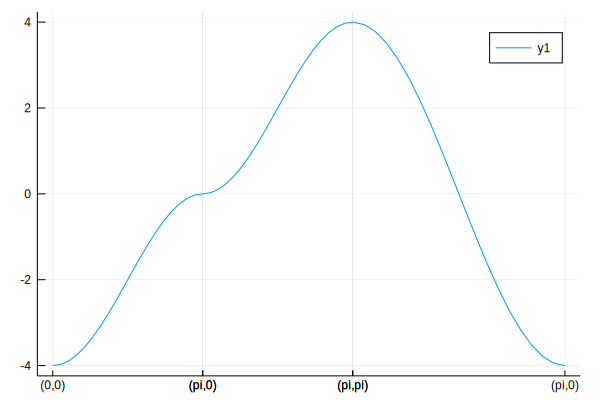

In [7]:
#バンド構造をプロットしてみる
#プロットしたいk点を作成するためにklinesを設定
        klines = set_Klines()
#プロットしたいk点をlineとして設定
        kmin = [0,0] #kの最小値
        kmax = [π,0] #kの最大値
        #kminからkmaxまでのlineがklinesに追加される
        add_Kpoints!(klines,kmin,kmax,"(0,0)","(pi,0)")

        kmin = [π,0]
        kmax = [π,π]
        add_Kpoints!(klines,kmin,kmax,"(pi,0)","(pi,pi)")

        kmin = [π,π]
        kmax = [0,0]
        add_Kpoints!(klines,kmin,kmax,"(pi,pi)","(pi,0)")

#バンド構造のプロット
calc_band_plot(klines,la2)

## グラフェン

In [8]:
#基本並進ベクトル
a1 = [sqrt(3)/2,1/2]
a2= [0,1]
#格子を設定
la = set_Lattice(2,[a1,a2])
#原子を追加
add_atoms!(la,[1/3,1/3])
add_atoms!(la,[2/3,2/3])
show_neighbers(la)

Possible hoppings
(1,1), x:-1//1, y:-1//1
(1,2), x:-2//3, y:-2//3
(2,2), x:-1//1, y:-1//1
(1,1), x:-1//1, y:0//1
(1,2), x:-2//3, y:1//3
(2,2), x:-1//1, y:0//1
(1,1), x:-1//1, y:1//1
(1,2), x:-2//3, y:4//3
(2,2), x:-1//1, y:1//1
(1,1), x:0//1, y:-1//1
(1,2), x:1//3, y:-2//3
(2,2), x:0//1, y:-1//1
(1,1), x:0//1, y:0//1
(1,2), x:1//3, y:1//3
(2,2), x:0//1, y:0//1
(1,1), x:0//1, y:1//1
(1,2), x:1//3, y:4//3
(2,2), x:0//1, y:1//1
(1,1), x:1//1, y:-1//1
(1,2), x:4//3, y:-2//3
(2,2), x:1//1, y:-1//1
(1,1), x:1//1, y:0//1
(1,2), x:4//3, y:1//3
(2,2), x:1//1, y:0//1
(1,1), x:1//1, y:1//1
(2,2), x:1//1, y:1//1


In [9]:
#ホッピングを設定
        t = 1.0
        add_hoppings!(la,-t,1,2,[1/3,1/3])
        add_hoppings!(la,-t,1,2,[-2/3,1/3])
        add_hoppings!(la,-t,1,2,[1/3,-2/3])

3-element Array{TightBinding.Hopping,1}:
 TightBinding.Hopping(-1.0, [1, 2], [0.333333, 0.333333]) 
 TightBinding.Hopping(-1.0, [1, 2], [-0.666667, 0.333333])
 TightBinding.Hopping(-1.0, [1, 2], [0.333333, -0.666667])

Plot the 2D lattice structure


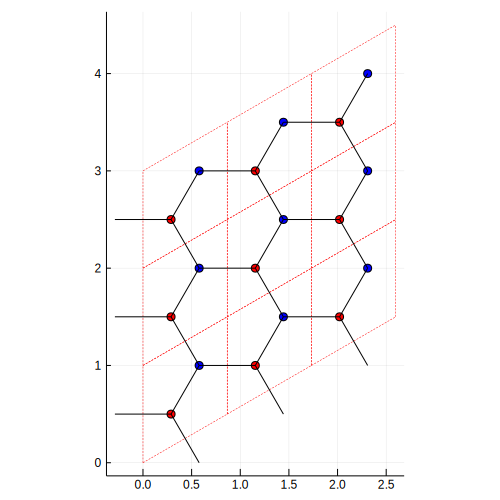

In [10]:
#結晶構造を見る
plot_lattice_2d(la)

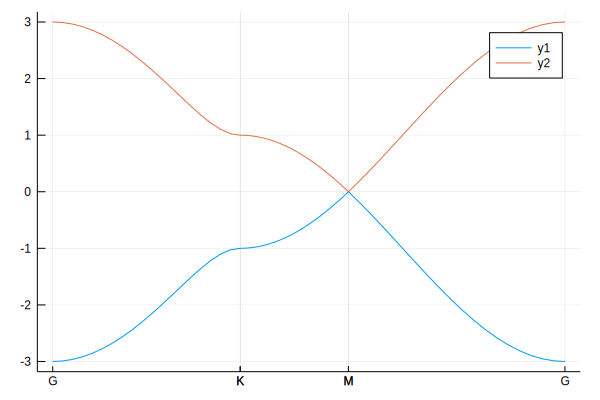

In [11]:
#バンド構造を見る
        klines = set_Klines()
        kmin = [0,0]
        kmax = [2π/sqrt(3),0]
        add_Kpoints!(klines,kmin,kmax,"G","K")

        kmin = [2π/sqrt(3),0]
        kmax = [2π/sqrt(3),2π/3]
        add_Kpoints!(klines,kmin,kmax,"K","M")

        kmin = [2π/sqrt(3),2π/3]
        kmax = [0,0]
        add_Kpoints!(klines,kmin,kmax,"M","G")
calc_band_plot(klines,la)

# グラフェンナノリボン
周期境界条件と端あり境界条件の場合

In [12]:
#すでに原子とホッピングは設定済み。
#プロットにつかうk点のlineを設定
klines = set_Klines()
kmin = [-π]
kmax = [π]
add_Kpoints!(klines,kmin,kmax,"-pi","pi")

1-element Array{TightBinding.Kpoints,1}:
 TightBinding.Kpoints([-3.14159], Irrational{:π}[π = 3.1415926535897...], 20, "-pi", "pi")

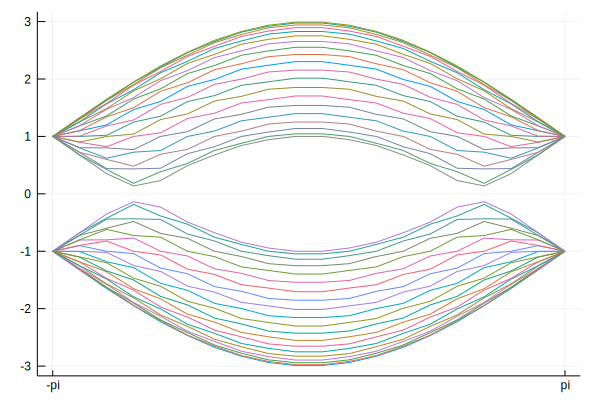

In [14]:

#周期境界条件を導入する方向
direction = 1
#周期境界条件
TightBinding.calc_band_plot_finite(klines,la,direction,periodic=true)

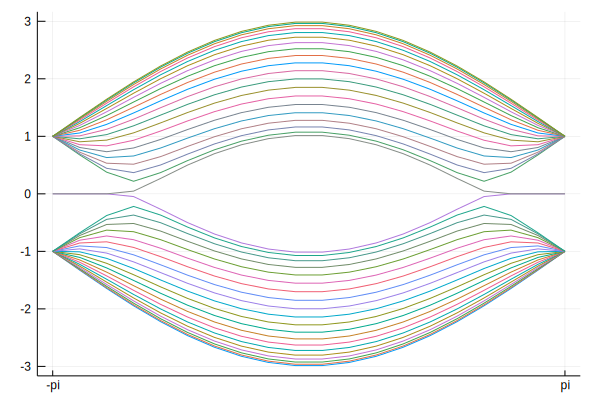

In [15]:
#基本並進ベクトルに垂直な壁を導入することができる。
direction = 1
#Open boundary condition
TightBinding.calc_band_plot_finite(klines,la,direction,periodic=false)

# 鉄系超伝導体の模型 2軌道模型
2軌道模型[S. Rachu et al. Phys. Rev. B 77, 220503(R) (2008)].を作ってみよう。

In [2]:
using TightBinding
la = set_Lattice(2,[[1,0],[0,1]]) #正方格子
#2軌道模型を考える。
add_atoms!(la,[0,0]) #dxz 軌道
add_atoms!(la,[0,0]) #dyz 軌道
#ホッピング
t1 = -1.0
t2 = 1.3
t3 = -0.85
t4 = t3
μ = 1.45

#dxz
add_hoppings!(la,-t1,1,1,[1,0])
add_hoppings!(la,-t2,1,1,[0,1])
add_hoppings!(la,-t3,1,1,[1,1])
add_hoppings!(la,-t3,1,1,[1,-1])

#dyz
add_hoppings!(la,-t2,2,2,[1,0])
add_hoppings!(la,-t1,2,2,[0,1])
add_hoppings!(la,-t3,2,2,[1,1])
add_hoppings!(la,-t3,2,2,[1,-1])

#between dxz and dyz
add_hoppings!(la,-t4,1,2,[1,1])
add_hoppings!(la,-t4,1,2,[-1,-1])
add_hoppings!(la,t4,1,2,[1,-1])
add_hoppings!(la,t4,1,2,[-1,1])

#Chemical potentials
set_μ!(la,μ) #set the chemical potential

┌ Info: Precompiling TightBinding [4482633c-c459-11e8-019e-737cadda7745]
└ @ Base loading.jl:1186


1.45

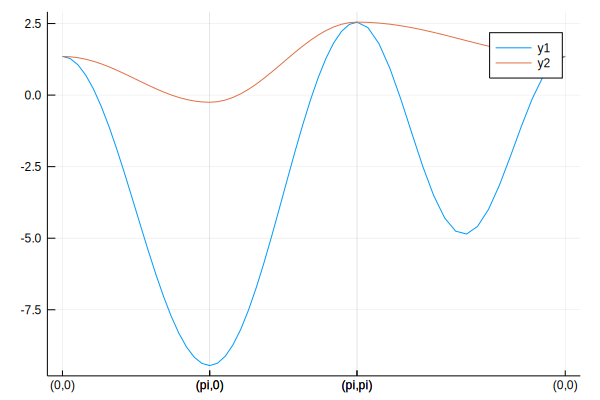

In [3]:
#バンド構造を見る。
klines = set_Klines()
kmin = [0,0]
kmax = [π,0]
add_Kpoints!(klines,kmin,kmax,"(0,0)","(pi,0)")

kmin = [π,0]
kmax = [π,π]
add_Kpoints!(klines,kmin,kmax,"(pi,0)","(pi,pi)")

kmin = [π,π]
kmax = [0,0]
add_Kpoints!(klines,kmin,kmax,"(pi,pi)","(0,0)")

pls = calc_band_plot(klines,la)

In [4]:

ham = hamiltonian_k(la) #ハミルトニアンは "ham([kx,ky])"で呼び出せる
kx = 0.1
ky = 0.2
hamk = ham([kx,ky]) #ham はk=[kx,ky]の関数
println(hamk)

[1.30741 -0.067435; -0.067435 1.2387]


# 鉄系超伝導体の模型 5軌道模型
K.Kurokiらが提案した鉄系超伝導体の5軌道模型[K. Kuroki et al., Phys. Rev. Lett. 101, 087004 (2008)]を作ってみよう。

In [1]:
using TightBinding
la = set_Lattice(2,[[1,0],[0,1]])
add_atoms!(la,[0,0])
add_atoms!(la,[0,0])
add_atoms!(la,[0,0])
add_atoms!(la,[0,0])
add_atoms!(la,[0,0])

tmat = [
-0.7    0 -0.4  0.2 -0.1
-0.8    0    0    0    0
 0.8 -1.5    0    0 -0.3
   0  1.7    0    0 -0.1
-3.0    0    0 -0.2    0
-2.1  1.5    0    0    0
 1.3    0  0.2 -0.2    0
 1.7    0    0  0.2    0
-2.5  1.4    0    0    0
-2.1  3.3    0 -0.3  0.7
 1.7  0.2    0  0.2    0
 2.5    0    0  0.3    0
 1.6  1.2 -0.3 -0.3 -0.3
   0    0    0 -0.1    0
 3.1 -0.7 -0.2    0    0
]
tmat = 0.1.*tmat
imap = zeros(Int64,5,5)
count = 0
for μ=1:5
    for ν=μ:5
        count += 1
        imap[μ,ν] = count
    end
end
Is = [1,-1,-1,1,1,1,1,-1,-1,1,-1,-1,1,1,1]
σds = [1,-1,1,1,-1,1,-1,-1,1,1,1,-1,1,-1,1]
tmat_σy = tmat[:,:]
tmat_σy[imap[1,2],:] = -tmat[imap[1,3],:]
tmat_σy[imap[1,3],:] = -tmat[imap[1,2],:]
tmat_σy[imap[1,4],:] = -tmat[imap[1,4],:]
tmat_σy[imap[2,2],:] = tmat[imap[3,3],:]
tmat_σy[imap[2,4],:] = tmat[imap[3,4],:]
tmat_σy[imap[2,5],:] = -tmat[imap[3,5],:]
tmat_σy[imap[3,3],:] = tmat[imap[2,2],:]
tmat_σy[imap[3,4],:] = tmat[imap[2,4],:]
tmat_σy[imap[3,5],:] = -tmat[imap[2,5],:]
tmat_σy[imap[4,5],:] = -tmat[imap[4,5],:]

hoppingmatrix = zeros(Float64,5,5,5,5)
hops = [-2,-1,0,1,2]
hopelements = [[1,0],[1,1],[2,0],[2,1],[2,2]]

for μ = 1:5
    for ν=μ:5
        for ii=1:5
            ihop = hopelements[ii][1]
            jhop = hopelements[ii][2]
            #[a,b],[a,-b],[-a,-b],[-a,b],[b,a],[b,-a],[-b,a],[-b,-a]

            #[a,b]
            i = ihop +3
            j = jhop +3
            hoppingmatrix[μ,ν,i,j]=tmat[imap[μ,ν],ii]
            #[a,-b] = σy*[a,b] [1,1] -> [1,-1]
            if jhop != 0
                i = ihop +3
                j = -jhop +3
                hoppingmatrix[μ,ν,i,j]=tmat_σy[imap[μ,ν],ii]
            end

            if μ != ν
                #[-a,-b] = I*[a,b] [1,1] -> [-1,-1],[1,0]->[-1,0]
                i = -ihop +3
                j = -jhop +3
                hoppingmatrix[μ,ν,i,j]=Is[imap[μ,ν]]*tmat[imap[μ,ν],ii]
                #[-a,b] = I*[a,-b] = I*σy*[a,b]  #[2,0]->[-2,0]
                if jhop != 0
                    i = -ihop +3
                    j = jhop +3
                    hoppingmatrix[μ,ν,i,j]=Is[imap[μ,ν]]*tmat_σy[imap[μ,ν],ii]
                end
            end
            #[b,a],[b,-a],[-b,a],[-b,-a]
            if jhop != ihop
                #[b,a] = σd*[a,b]
                i = jhop +3
                j = ihop +3
                hoppingmatrix[μ,ν,i,j]=σds[imap[μ,ν]]*tmat[imap[μ,ν],ii]
                #[-b,a] = σd*σy*[a,b]
                if jhop != 0
                    i = -jhop +3
                    j = ihop +3
                    hoppingmatrix[μ,ν,i,j]=σds[imap[μ,ν]]*tmat_σy[imap[μ,ν],ii]
                end

                if μ != ν
                    #[-b,-a] = σd*[-a,-b] = σd*I*[a,b]
                    i = -jhop +3
                    j = -ihop +3
                    hoppingmatrix[μ,ν,i,j]=σds[imap[μ,ν]]*Is[imap[μ,ν]]*tmat[imap[μ,ν],ii]
                    #[b,-a] = σd*[-a,b] = σd*I*[a,-b] = σd*I*σy*[a,b]  #[2,0]->[-2,0]
                    if jhop != 0
                        i = jhop +3
                        j = -ihop +3
                        hoppingmatrix[μ,ν,i,j]=σds[imap[μ,ν]]*Is[imap[μ,ν]]*tmat_σy[imap[μ,ν],ii]
                    end
                end
            end
        end


    end
end

for μ=1:5
    for ν=μ:5
        for i = 1:5
            ih = hops[i]
            for j = 1:5
                jh = hops[j]
                if hoppingmatrix[μ,ν,i,j] != 0.0                
                    add_hoppings!(la,hoppingmatrix[μ,ν,i,j],μ,ν,[ih,jh])
                end
            end
        end
    end
end

onsite = [10.75,10.96,10.96,11.12,10.62]
set_onsite!(la,onsite)

set_μ!(la,10.96) #set the chemical potential

10.96

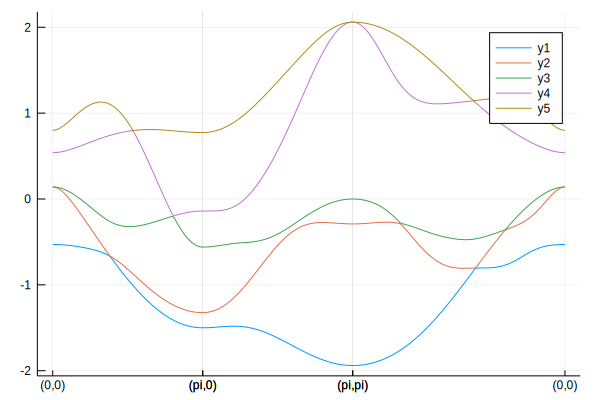

In [2]:
#バンド図をプロットしよう。
nk = 100
klines = set_Klines()
kmin = [0,0]
kmax = [π,0]
add_Kpoints!(klines,kmin,kmax,"(0,0)","(pi,0)",nk=nk)

kmin = [π,0]
kmax = [π,π]
add_Kpoints!(klines,kmin,kmax,"(pi,0)","(pi,pi)",nk=nk)

kmin = [π,π]
kmax = [0,0]
add_Kpoints!(klines,kmin,kmax,"(pi,pi)","(0,0)",nk=nk)

pls = calc_band_plot(klines,la)


この図は[T. Nomura, J. Phys. Soc. Jpn. 78, 034716 (2009)]の図2と同じになっている。

フェルミ面は

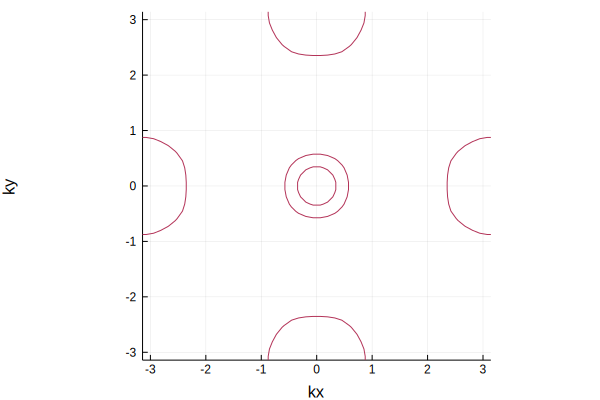

In [3]:

pls = plot_fermisurface_2D(la)

# 波数表示のハミルトニアンから表面ハミルトニアンを構築する

ハミルトニアン$H(k)$が与えられているときに、そのハミルトニアンを使った場合に表面に束縛状態が現れるかどうかをみてみる。
例として、

$$
H(k) = A_x \sin k_x \sigma_x +  A_y \sin k_y \sigma_y + m(k) \sigma_z
$$
$$
m(k) = m_0 + 2m_{2x} (1-\cos k_x)+2 m_{2y} (1-\cos k_y)
$$
というトポロジカル絶縁体の模型を考える。ここで、パラメータを
$$
A_x = 1 \\
A_y = 1 \\
m_{2x} = 1 \\
m_{2y} = m_{2x} \\
m_0 = -2 m_{2x} 
$$
とする。

これを



In [5]:
using TightBinding
Ax = 1
Ay = 1
m2x = 1
m2y = m2x
m0 = -2*m2x
m(k) = m0 + 2m2x*(1-cos(k[1]))+2m2y*(1-cos(k[2]))
Hk(k) = Ax*sin(k[1]).*σx +  Ay*sin(k[2]).*σy + m(k).*σz

Hk (generic function with 1 method)

として定義しておく。ここで、パウリ行列σx,σy,σz,σ0はTightBindingを読み込むと定義される。

あとは、

In [6]:
norb = 2 # 軌道の数
hamiltonian = surfaceHamiltonian(Hk,norb,numhop=3,L=32,kpara="kx",BC="OBC")

#2 (generic function with 1 method)

とすれば表面ハミルトニアンの出来上がりである。

バンド図は

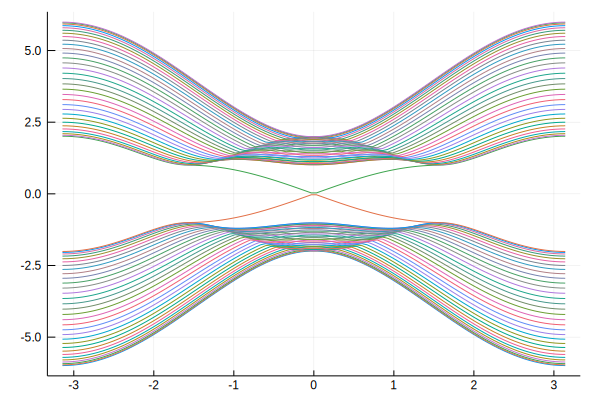

In [11]:
using Plots
using LinearAlgebra
nkx = 100
kxs = range(-π,stop=π ,length=nkx)
mat_e = zeros(Float64,nkx,32*2)
for i=1:nkx
    kx = kxs[i]
    mat_h = hamiltonian(kx)
    #println(mat_h)
    
    e,v = eigen(Matrix(mat_h))
    #println(e)
    mat_e[i,:] = real.(e[:])
end
plot(kxs,mat_e,labels="")

壁がない場合のバンド図は、PBCをセットすればよく

In [9]:
norb = 2 # 軌道の数
hamiltonian_PBC = surfaceHamiltonian(Hk,norb,numhop=3,L=32,kpara="kx",BC="PBC")

#2 (generic function with 1 method)

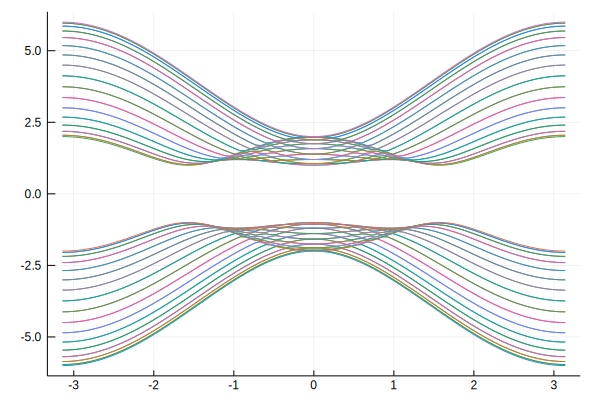

In [12]:
using Plots
using LinearAlgebra
nkx = 100
kxs = range(-π,stop=π ,length=nkx)
mat_e = zeros(Float64,nkx,32*2)
for i=1:nkx
    kx = kxs[i]
    mat_h = hamiltonian_PBC(kx)
    #println(mat_h)
    
    e,v = eigen(Matrix(mat_h))
    #println(e)
    mat_e[i,:] = real.(e[:])
end
plot(kxs,mat_e,labels="")


とすればよい。